# Phase 3 Data Science Training Notebook

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


## Exploratory Data Analysis

In [5]:
import tarfile

def extractFiles(tarFileName):
    fileObj = tarfile.open(tarFileName, "r")
    fileObj.extractall("C:\Phase3/2022-Phase-3\data-science\skeleton-code")
    fileObj.close()

In [6]:
extractFiles("cifar-10-python.tar.gz")


In [7]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [8]:
from cgi import test


batch1 = unpickle("cifar-10-batches-py/data_batch_1")
batch2 = unpickle("cifar-10-batches-py/data_batch_2")
batch3 = unpickle("cifar-10-batches-py/data_batch_3")
batch4 = unpickle("cifar-10-batches-py/data_batch_4")
batch5 = unpickle("cifar-10-batches-py/data_batch_5")
testBatch = unpickle("cifar-10-batches-py/test_batch")

testBatchData = testBatch[b'data']
print(testBatch.keys())
shapedTestBatchData = testBatchData.reshape(len(testBatchData),3,32, 32).transpose(0,2,3,1) # reshaped data into 32x32 image
print(shapedTestBatchData.shape)

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
(10000, 32, 32, 3)


In [24]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

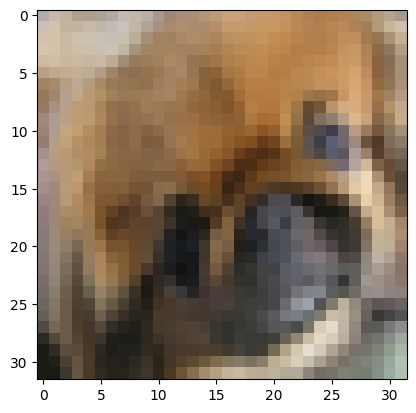

In [9]:
plt.imshow(shapedTestBatchData[2342]) # testing if data has been shaped correctly.

In [10]:
allFileNamesList = list()
allLabelsList = list()
allFileNamesList.extend(batch1[b'filenames'])
allFileNamesList.extend(batch2[b'filenames'])
allFileNamesList.extend(batch3[b'filenames'])
allFileNamesList.extend(batch4[b'filenames'])
allFileNamesList.extend(batch5[b'filenames'])
allLabelsList += batch1[b'labels']
allLabelsList += batch2[b'labels']
allLabelsList += batch3[b'labels']
allLabelsList += batch4[b'labels']
allLabelsList += batch5[b'labels']
print(len(allFileNamesList))
allDataList = np.concatenate((batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']), axis =0)
allDataList.shape


50000


(50000, 3072)

In [11]:
allShapedData = allDataList.reshape(len(allDataList),3,32,32).transpose(0,2,3,1)
allShapedData.shape


(50000, 32, 32, 3)

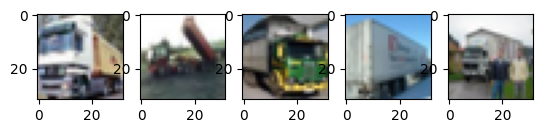

In [12]:
truck_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 9:
        truck_indices.append(j)
for i in range(0,5):
    image = allShapedData[truck_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

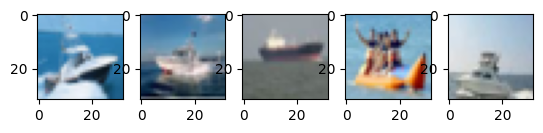

In [13]:
boat_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 8:
        boat_indices.append(j)
for i in range(0,5):
    image = allShapedData[boat_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

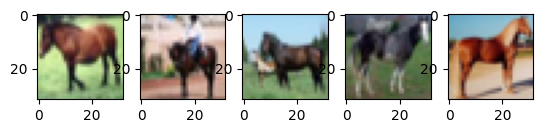

In [14]:
horse_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 7:
        horse_indices.append(j)
for i in range(0,5):
    image = allShapedData[horse_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

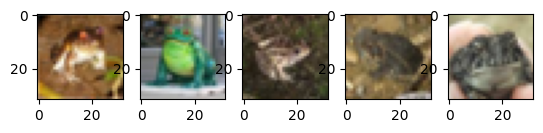

In [15]:
frog_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 6:
        frog_indices.append(j)
for i in range(0,5):
    image = allShapedData[frog_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

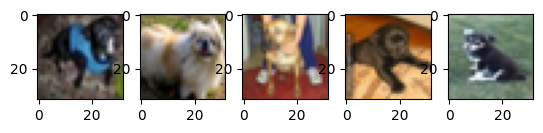

In [16]:
dog_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 5:
        dog_indices.append(j)
for i in range(0,5):
    image = allShapedData[dog_indices[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
plt.show()

# Data Processing

In [17]:
allShapedData = allDataList.reshape(len(allDataList),3,32,32).transpose(0,2,3,1)

train_x = allShapedData
train_y = np.array(allLabelsList)

test_x = shapedTestBatchData
test_y = np.array(testBatch[b'labels'])

train_x, test_x = train_x / 255.0, test_x / 255.0


# Data Modelling

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

In [19]:
def generateModel():
    """
    Make a Keras Sequential Model.
    Feel free to change the layout of the layers.

    Read more about keras here: https://keras.io/api/
    Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
    """
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(32,32,3))) # Input layer.

    # model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

    model.add(layers.Dense(40, activation="relu")) # Example Hidden Layer 1. Has 40 Nodes.
    model.add(layers.Dense(25, activation="relu")) # Example Hidden Layer 2. Has 25 Nodes.
    model.add(layers.Dense(15, activation="sigmoid")) # Example Hidden Layer 3. Has 15 Nodes.

    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

    # model.compile(
    #     optimizer='SGD',
    #     loss= 'sparse_categorical_crossentropy',
    #     metrics=['accuracy']
    # )
    model.compile(
        optimizer=optimizers.SGD(learning_rate=0.01),
        loss=losses.MeanAbsoluteError(),
        metrics=['accuracy']
    )

    return model

In [20]:
import os


model = generateModel()

log_dir = os.path.join(r'output\logs' , datetime.now().strftime("%Y-%m-%d-%H%M%S"))

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=5,
    batch_size=100, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    # verbose=0 # Uncomment this line to reduce the printing on console.
)

Epoch 1/5
 11/500 [..............................] - ETA: 3:09 - loss: 4.0036 - accuracy: 0.1045

KeyboardInterrupt: 

In [21]:
mlmodel = Sequential()
mlmodel.add(layers.Flatten(input_shape=(32,32,3)))
mlmodel.add(layers.Dense(3000, activation = "relu"))
mlmodel.add(layers.Dense(200, activation = "relu"))
mlmodel.add(layers.Dense(40, activation = "softmax"))

log_dir = os.path.join(r'output\logs' , datetime.now().strftime("%Y-%m-%d-%H%M%S"))

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

mlmodel.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlmodel.fit(train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=15,
    batch_size=100, # Set this to a lower number if your computer spec is bad.

    # verbose=0 # Uncomment this line to reduce the printing on console.
)

Epoch 1/15
500/500 [==============================] - 61s 121ms/step - loss: 1.9887 - accuracy: 0.2931 - val_loss: 1.8191 - val_accuracy: 0.3486
Epoch 2/15
500/500 [==============================] - 58s 117ms/step - loss: 1.7801 - accuracy: 0.3718 - val_loss: 1.7749 - val_accuracy: 0.3769
Epoch 3/15
500/500 [==============================] - 58s 115ms/step - loss: 1.6972 - accuracy: 0.4047 - val_loss: 1.6668 - val_accuracy: 0.4099
Epoch 4/15
500/500 [==============================] - 58s 115ms/step - loss: 1.6436 - accuracy: 0.4245 - val_loss: 1.6710 - val_accuracy: 0.4124
Epoch 5/15
500/500 [==============================] - 59s 119ms/step - loss: 1.5996 - accuracy: 0.4393 - val_loss: 1.6007 - val_accuracy: 0.4384
Epoch 6/15
500/500 [==============================] - 50s 100ms/step - loss: 1.5626 - accuracy: 0.4530 - val_loss: 1.5765 - val_accuracy: 0.4511
Epoch 7/15
500/500 [==============================] - 48s 97ms/step - loss: 1.5337 - accuracy: 0.4638 - val_loss: 1.5367 - val_acc

In [23]:
mlmodel.evaluate(test_x, test_y, verbose=2)


313/313 - 5s - loss: 1.4356 - accuracy: 0.4932 - 5s/epoch - 16ms/step


[1.4355759620666504, 0.49320000410079956]

In [29]:
predict =   mlmodel.predict(test_x)





313/313 [==============================] - 5s 17ms/step


frog
frog


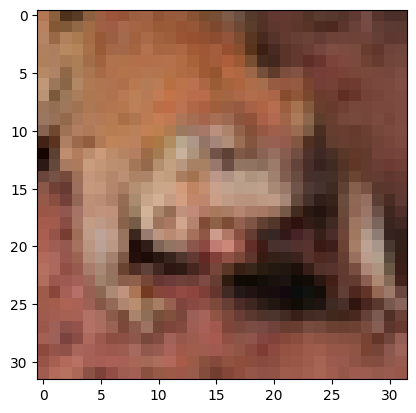

In [33]:
k = 5
prediction = np.argmax(predict[k])
print(classes[prediction])
plt.imshow(shapedTestBatchData[k])
print(classes[testBatch[b'labels'][k]])

(32, 32, 3)

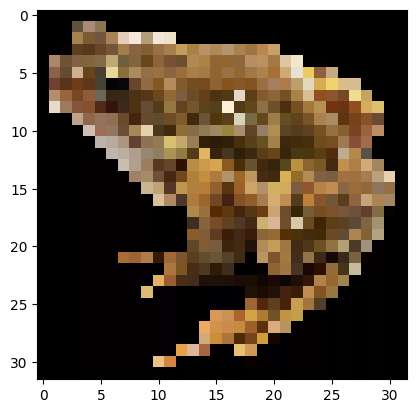

In [46]:
def process_image(png):
    importedImage = tf.keras.preprocessing.image.load_img(png, target_size = (32,32))
    importedImage = tf.keras.preprocessing.image.img_to_array(importedImage)
    importedImage = importedImage/255.0
    importedImage.reshape(32,32,3)
    plt.imshow(importedImage)
    return importedImage
importedImage = process_image('phase3Frog.png') 
importedImage.shape

In [50]:
def whatIsIt(png):
    importedImage = process_image(png)
    imagePredict = mlmodel.predict(importedImage)
    predIndex = np.argmax(imagePredict)
    print(classes[predIndex])
    plt.imshow(importedImage)

1/1 [==============================] - 0s 43ms/step
ship


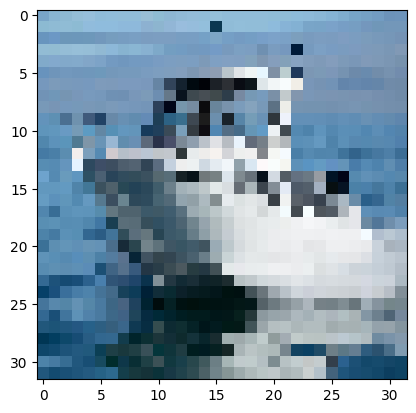

In [54]:
whatIsIt('phase3Boat.png')

In [16]:
mlmodel.save('output/my_model')

INFO:tensorflow:Assets written to: output/my_model\assets
